In [13]:
import linkpred
import random
from matplotlib import pyplot as plt

random.seed(100)

In [14]:
G = linkpred.read_network('network.net')

In [33]:
test = G.subgraph(random.sample(G.nodes(), 1000))

In [34]:
training = G.copy()
training.remove_edges_from(test.edges())

In [39]:
simrank = linkpred.predictors.SimRank(training, excluded=training.edges())

In [40]:
simrank_results = simrank.predict()


In [35]:
jaccard = linkpred.predictors.Jaccard(training, excluded=training.edges())

In [36]:
jaccard_results = jaccard.predict()


In [37]:
test_set = set(linkpred.evaluation.Pair(u, v) for u, v in test.edges())


In [ ]:
evaluation = linkpred.evaluation.EvaluationSheet(simrank_results, test_set)
plt.plot(evaluation.recall(), evaluation.precision())

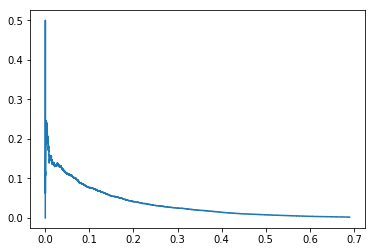

In [38]:
evaluation_j = linkpred.evaluation.EvaluationSheet(jaccard_results, test_set)
plt.plot(evaluation_j.recall(), evaluation_j.precision())